# Project Investigating Aviation Accidents with Different Sorting Algorithms

In this project a dataset of aviation accidents will be analyzed. This will be done by creating different sorting algorithms to arrange the data and then find patterns in it. The sorting algorithms will be analyzed on their computational expense and thus the duration they will take to sort through the dataset. Increasingly efficient algorithms will be constructed to cut down on cost.

## Setup

In [2]:
#imports
import csv
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
import math

### Reading in Data:

In [3]:
f = open('AviationData.txt','r')
csvreader = csv.reader(f, delimiter = '|')
AviationData = list(csvreader)

In [4]:
AviationData[1]

['20191123X03127 ',
 ' Accident ',
 ' GAA20CA094 ',
 ' 11/23/2019 ',
 ' Simsbury, CT ',
 ' United States ',
 ' 41.916111 ',
 ' -72.776945 ',
 ' 4B9 ',
 ' Simsbury ',
 ' Unavailable ',
 ' Substantial ',
 ' Airplane ',
 ' N5776W ',
 ' Piper ',
 ' PA28 ',
 ' No ',
 ' 1 ',
 '  ',
 ' Part 91: General Aviation ',
 '  ',
 ' Instructional ',
 '  ',
 '  ',
 '  ',
 '  ',
 '  ',
 '  ',
 '  ',
 ' Preliminary ',
 ' 11/27/2019 ',
 ' ']

The data is currently very unorganized. It will now be put into list form to make it easier to work with:

In [7]:
aviation_list = []
for row in AviationData[:]:
    lst = []
    for item in row:
        lst.append(item.strip())
    aviation_list.append(lst)

In [8]:
aviation_list[:5]

[['Event Id',
  'Investigation Type',
  'Accident Number',
  'Event Date',
  'Location',
  'Country',
  'Latitude',
  'Longitude',
  'Airport Code',
  'Airport Name',
  'Injury Severity',
  'Aircraft Damage',
  'Aircraft Category',
  'Registration Number',
  'Make',
  'Model',
  'Amateur Built',
  'Number of Engines',
  'Engine Type',
  'FAR Description',
  'Schedule',
  'Purpose of Flight',
  'Air Carrier',
  'Total Fatal Injuries',
  'Total Serious Injuries',
  'Total Minor Injuries',
  'Total Uninjured',
  'Weather Condition',
  'Broad Phase of Flight',
  'Report Status',
  'Publication Date',
  ''],
 ['20191123X03127',
  'Accident',
  'GAA20CA094',
  '11/23/2019',
  'Simsbury, CT',
  'United States',
  '41.916111',
  '-72.776945',
  '4B9',
  'Simsbury',
  'Unavailable',
  'Substantial',
  'Airplane',
  'N5776W',
  'Piper',
  'PA28',
  'No',
  '1',
  '',
  'Part 91: General Aviation',
  '',
  'Instructional',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'Preliminary',
  '11/27/2019',

In [9]:
len(aviation_list)

84172

The first objective is to find the accident code `LAX94LA336` in the dataset. This code could be in any row or column. As a first approach a searching algorithm will be used, that searches through each row and column, one by one. This approach is likely to be very time consuming and inefficient:

In [11]:
lax_code = []
for entry in aviation_list:
    for item in entry:
        if 'LAX94LA336' in item:
            lax_code.append(entry)

In [12]:
lax_code

[['20001218X45447',
  'Accident',
  'LAX94LA336',
  '07/19/1962',
  'BRIDGEPORT, CA',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(4)',
  'Destroyed',
  '',
  'N5069P',
  'PIPER',
  'PA24-180',
  'No',
  '1',
  'Reciprocating',
  '',
  '',
  'Personal',
  '',
  '4',
  '0',
  '0',
  '0',
  'UNK',
  'UNKNOWN',
  'Probable Cause',
  '09/19/1996',
  '']]

Even though this approach was incredibly cumbersome, the task was completed in very short time. But this algorithm was exponential time. This means in larger datasets this search could take up a considerable amount of time and would be very inefficient. Because the algorithm has to search through each item in each row, it has to compute $O(n^2)$ operations.

## Writing a linear time algorithm:

Even though the intuitive thing to do would be to use search the entire row, this would just mean, that python still has to search each individual element in each row. The searching algorithm can be improved, by looking through the dataset and realizing, that the code is going to be in the `Accident Number` column and only searching that column, which has the index 2.

In [13]:
lax_code = []
for row in aviation_list:
    if 'LAX94LA336' in row[2]:
        lax_code.append(row)
        
lax_code

[['20001218X45447',
  'Accident',
  'LAX94LA336',
  '07/19/1962',
  'BRIDGEPORT, CA',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(4)',
  'Destroyed',
  '',
  'N5069P',
  'PIPER',
  'PA24-180',
  'No',
  '1',
  'Reciprocating',
  '',
  '',
  'Personal',
  '',
  '4',
  '0',
  '0',
  '0',
  'UNK',
  'UNKNOWN',
  'Probable Cause',
  '09/19/1996',
  '']]

The linear time algorithm is faster than the exponential time one. 

## Logarithmic Time Algorithm

In the next step a logarithmic time algorithm will be constructed. In order to do this, the dataset will need to be ordered by the `Accident Number` column. This is a very time consuming task and additional hard drive space will have to be allocated to the newly sorted dataset. But this is a one-time investment if the new dataset is saved after sorting. So in cases where the same column is searched multiple times, this quickly becomes computationally cheaper. This sorting process will first be done using Pandas and later two different sorting algorithms will be constructed and tested for expense, i.e. the time they take to complete the sort the dataset.

In [14]:
acc_sort = pd.DataFrame(aviation_list[1:], columns = aviation_list[0]).sort_values('Accident Number')
acc_sort

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,
36606,20001212X20184,Accident,ANC00FA018,12/07/1999,"BETHEL, AK",United States,,,,,...,"GRANT AVIATION, INC.",6,0,0,0,IMC,CRUISE,Probable Cause,04/18/2001,
36371,20001212X20436,Accident,ANC00FA024,02/05/2000,"ILIAMNA, AK",United States,,,,,...,,6,0,0,0,UNK,CRUISE,Probable Cause,07/17/2001,
35884,20001212X20930,Accident,ANC00FA052,05/01/2000,"KOTZEBUE, AK",United States,,,,,...,,1,0,0,0,IMC,CRUISE,Probable Cause,07/10/2001,
35834,20001212X20931,Accident,ANC00FA056,05/09/2000,"ANCHORAGE, AK",United States,,,MRI,MERRILL FIELD,...,,0,0,0,2,VMC,DESCENT,Probable Cause,07/10/2001,
35529,20001212X21133,Accident,ANC00FA076,06/22/2000,"TUNTUTULIAK, AK",United States,,,AK61,TUNTUTULIAK,...,,1,1,0,0,VMC,TAKEOFF,Probable Cause,07/10/2001,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,20191007X02421,Accident,WPR20WA003,10/06/2019,"Sultanpur, India",India,,,,,...,,2,,,,,,Foreign,,
142,20191009X41754,Accident,WPR20WA006,10/06/2019,"Huhudi, South Africa",South Africa,,,,,...,,1,1,,,,UNKNOWN,Foreign,,
124,20191022X82728,Accident,WPR20WA010,10/11/2019,"Port Said City, Egypt",Egypt,32.956944,32.303889,,,...,,,,,5,,MANEUVERING,Foreign,,
106,20191022X83614,Accident,WPR20WA011,10/15/2019,"Singapore, Singapore",Singapore,,,,,...,,,,,1,,TAKEOFF,Foreign,,


## The sorting Algorithm:

First an inefficient sorting algorithm will be made:
An empty list `newer_sort` is created. The sorted items will be added to this list in the correct order

This algorithm will look at each item in each list in `aviation_list`. It will then:

1. check if the list of sorted items is empty and if so append the item
2. check if the item is larger than the largest item currently in the list and append if so
3. check if the item is smaller than the min in the list and add item at the beginning if so
4. if none of these apply, the item has to be added somewhere in between. another algorithm is then used that looks through every single item in the sorted list until it finds two adjacent items where one is smaller than the item to add and one is larger. The new item is then added in between these two

The whole function is also timed, to be able to evaluate its efficiency. This sorting algorithm is of course very inefficient and will take a long time to sort the entire dataset, but it is a functional first sorting algorithm and it can be improved upon and used as a benchmark.

In [15]:
def inef_sort(nr):
    '''Find the right place for an accident number in a list
    Args:
        nr(str): index of the accident number to insert into the newer_sort list
    Returns:
        list: version of the newer_sort list with the new item added in the correct place
    '''
    aviation_list_copy = aviation_list
    t0 = time.time()    
    newer_sort = []
    for item in aviation_list_copy[:nr]:
        # for first item
        if len(newer_sort)==0:
            newer_sort.append(item)
        # for items higher or lower than the maximum, minimum in list
        elif item[2] > newer_sort[-1][2]:
            newer_sort.append(item)
        elif item[2] < newer_sort[0][2]:
            newer_sort.insert(0, item)
        # All items in the middle
        else:
            i = 0
            for entry in newer_sort:
                if item[2] > entry[2]:
                    i += 1
            newer_sort.insert(i, item)
#             print('middle')
#             print(newer_sort)
    dt = time.time()-t0
    return dt, newer_sort

This algorithm is very inefficient, for every newly added item it checks every item in the list, that is lower than the new item. This means that the longer the list the higher the time. This algorithm would be expected to be exponential time. To test this the time it takes the algorithm to complete will be plotted against the number of items sorted.

In [21]:
print(inef_sort(2000)[0])

0.11210179328918457


In [22]:
ns1 = []
ts1 = []
for item in [10,20,30,40,50,100,500,1000, 2000, 3000, 4000, 5000, 10000]:
    ns1.append(item)
    ts1.append(inef_sort(item)[0])
    

In [23]:
print(ns1)
print(ts1)

[10, 20, 30, 40, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006005525588989258, 0.027023792266845703, 0.1141047477722168, 0.25623273849487305, 0.46993088722229004, 0.7416744232177734, 3.1094553470611572]


Text(0.5, 1.0, 'Time Over Items to Sort')

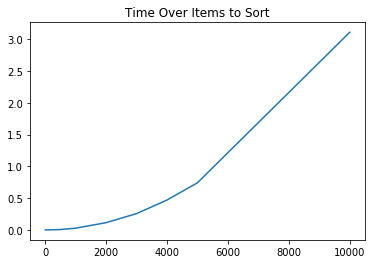

In [24]:
plt.plot(ns1,ts1)
plt.title('Time Over Items to Sort')

This sorting algorithm does show exponential time dependence. This is obviously not ideal. The first step to improving it would be to replace the inner loop looking to place the current item, which currently is linear time with an algorithm that is logarithmic time. This should improve the performance significantly.

## More Efficient Sorting Algorithm:

This new algorithm will be added to the sorting function for the case where the new item needs to be added where it has two neighbors.

It will:

1. Find the middle of the list of already sorted items
2. Check whether the item in the middle of the list is larger or smaller than the new item
3. In either case find out if the middle of the list is the right place to put the item and insert accordingly and end the function
4. If the item in the middle of the sorted list is larger than the new item, the algorithm will cut out all items from the list larger than the middle index and call the function again with the newly cut list. The recursion will continue until the right place for the new item is found
5. If the item in the middle is smaller than the new item, the algorithm will cut out the upper half of the list and call itself again. The algorithm will recur until the right place for the new item is found

This new sorting algorithm should improve the efficiency of the sorting algorithm significantly because finding the place for a new item in the middle of the list is by far the most expensive part of the algorithm.

In [25]:
lst = list(range(15))
n = 5.5
lower = 0
upper = len(lst)
def find_place(n, lower, upper):
    '''Find the right place to insert an item n in a list limited by upper and lower boundaries
    Args:
        n(str): accident number to insert into the list
        lower(int): lower boundary of the list to insert the new item into
        upper(int): upper boundary of the list to insert the new item into
    '''
    ind = math.floor((upper + lower) / 2)
    if n < lst[ind]:
        if n > lst[ind-1]:
            lst.insert(ind, n)
        else:
            upper = ind
            find_place(n, lower, upper)
    if n > lst[ind]:
        if n < lst[ind + 1]:
            lst.insert(ind + 1, n)
        else:
            lower = ind
            find_place(n, lower, upper)
find_place(13.7, 0 , len(lst))
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13.7, 14]

This sorting algorithm needs to be modified slightly, because it uses the items of a list to sort instead of a sub-item of an item, which is what is needed to sort the list by the accident number that is identified by an index

In [26]:
def find_place(lst, n, lower, upper):
    '''Find the right place to insert an item n in a list limited by upper and lower boundaries
    Args:
        lst(list): list of sorted items
        n(str): accident number to insert into the list
        lower(int): lower boundary of the list to insert the new item into
        upper(int): upper boundary of the list to insert the new item into
        '''
    ind = math.floor((upper + lower) / 2)
    if n[2] < lst[ind][2]:
        if n[2] > lst[ind-1][2]:
            lst.insert(ind, n)
        else:
            upper = ind
            find_place(lst, n, lower, upper)
    if n[2] > lst[ind][2]:
        if n[2] < lst[ind + 1][2]:
            lst.insert(ind + 1, n)
        else:
            lower = ind
            find_place(lst, n, lower, upper)

This sorting algorithm is logarithmic time and should improve the performance of the complete sorting algorithm.

In [27]:
np.random.seed(0)
random_list = []
def more_ef_sort(nr):
    '''Insert item into list alphabetically
    Args:
        nr(str): index of accident number to insert
    Returns:
        float: time it took to complete the operation (s)
        list: list with inserted item
    '''
    aviation_list_copy = aviation_list
    t0 = time.time()    
    newer_sort = []
    for item in aviation_list_copy[:nr]:
        if len(newer_sort)==0:
            newer_sort.append(item)
        elif item[2] > newer_sort[-1][2]:
            newer_sort.append(item)
        elif item[2] < newer_sort[0][2]:
            newer_sort.insert(0, item)
        else:
            find_place(newer_sort, item, 0, len(newer_sort))
    dt = time.time()-t0
    return dt, newer_sort

In [28]:
ns2 = []
ts2 = []
for item in [10,20,30,40,50,100,500,1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, len(aviation_list)]:
    ns2.append(item)
    ts2.append(more_ef_sort(item)[0])
    

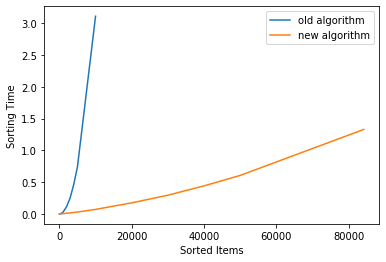

In [29]:
plt.plot(ns1,ts1, label = 'old algorithm')
plt.plot(ns2,ts2, label = 'new algorithm')
plt.legend()
plt.xlabel('Sorted Items')
plt.ylabel('Sorting Time')
plt.title('Time to sort over Sorted')
plt.show()

The algorithm is much more efficient than the original algorithm that sorted through each item in the previously sorted list. The total algorithm still does not show a logarithmic time dependence, but an almost linear one. Now to check if the two algorithms have the same result:

In [31]:
inef_sort(10000)[1] == more_ef_sort(10000)[1]

True

The performance improvement of this algorithm over the original is astonishing. It could probably be improved further, but for the current project with only 85000 rows this is very good.

## Logarithmic Search Algorithm

As discussed earlier, the problem with a logarithmic search algorithm is that the data needs to be ordered in respect to the column being searched, but with the new sorting algorithm this task is actually not very expensive. Now a searching algorithm can be written using the algorithm at the heart of the efficient sorting algorithm:

In [32]:
sorted_avlst = more_ef_sort(len(aviation_list))[1]
sorted_avlst[:5]

[['20001212X20184',
  'Accident',
  'ANC00FA018',
  '12/07/1999',
  'BETHEL, AK',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(6)',
  'Destroyed',
  '',
  'N1747U',
  'Cessna',
  '207',
  'No',
  '1',
  'Reciprocating',
  '',
  'SCHD',
  'Unknown',
  'GRANT AVIATION, INC.',
  '6',
  '0',
  '0',
  '0',
  'IMC',
  'CRUISE',
  'Probable Cause',
  '04/18/2001',
  ''],
 ['20001212X20436',
  'Accident',
  'ANC00FA024',
  '02/05/2000',
  'ILIAMNA, AK',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(6)',
  'Destroyed',
  '',
  'N756HG',
  'Cessna',
  'U206G',
  'No',
  '1',
  'Reciprocating',
  '',
  'NSCH',
  'Unknown',
  '',
  '6',
  '0',
  '0',
  '0',
  'UNK',
  'CRUISE',
  'Probable Cause',
  '07/17/2001',
  ''],
 ['20001212X20930',
  'Accident',
  'ANC00FA052',
  '05/01/2000',
  'KOTZEBUE, AK',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(1)',
  'Destroyed',
  '',
  'N3935Z',
  'Piper',
  'PA-18',
  'No',
  '1',
  'Reciprocating',
  '',
  '',
  'Personal',
  '',
  '1',


In [33]:
lax_nr = 'LAX94LA336'

def search_codes(lax_code, lst, code, lower, upper):
    '''Search for a code within a list
    Args:
        lax_code(list): list to insert the found code into
        lst(list): list to search for the code
        lower(int): lower boundary of the part of the list to search
        upper(int): upper boundary of the part of the list to search
    Returns:
        list: list with all data in the code that was searched for
    '''
    ind = math.floor((lower + upper) / 2)
    if code < lst[ind][2]:
        upper = ind
        search_codes(lax_code, lst, code, lower, upper)
    elif code > lst[ind][2]:
        lower = ind
        search_codes(lax_code, lst, code, lower, upper)
    else:
        lax_code.append(lst[ind])
    return lax_code
lax_code = []
lax_code = search_codes(lax_code,sorted_avlst, lax_nr, 0 , len(sorted_avlst))
lax_code

[['20001218X45447',
  'Accident',
  'LAX94LA336',
  '07/19/1962',
  'BRIDGEPORT, CA',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(4)',
  'Destroyed',
  '',
  'N5069P',
  'PIPER',
  'PA24-180',
  'No',
  '1',
  'Reciprocating',
  '',
  '',
  'Personal',
  '',
  '4',
  '0',
  '0',
  '0',
  'UNK',
  'UNKNOWN',
  'Probable Cause',
  '09/19/1996',
  '']]

The core of the search algorithm is in logarithmic time. The performance benefit is hard to measure in such a small dataset, but it should perform significantly better, especially in a very large dataset.

## List of Dictionaries:

Now a list of dictionaries will be used to store the data instead of a list of lists. Every item in the list will be a dictionary containing the column names as keys and the entries of a given row as the values

In [34]:
aviation_dict_list = []
columns = aviation_list[0]
for row in aviation_list[1:]:
    dict = {}
    for i in range(len(columns)):
        dict[columns[i]] = row[i]
    aviation_dict_list.append(dict)

In [35]:
aviation_dict_list[:5]

[{'Event Id': '20191123X03127',
  'Investigation Type': 'Accident',
  'Accident Number': 'GAA20CA094',
  'Event Date': '11/23/2019',
  'Location': 'Simsbury, CT',
  'Country': 'United States',
  'Latitude': '41.916111',
  'Longitude': '-72.776945',
  'Airport Code': '4B9',
  'Airport Name': 'Simsbury',
  'Injury Severity': 'Unavailable',
  'Aircraft Damage': 'Substantial',
  'Aircraft Category': 'Airplane',
  'Registration Number': 'N5776W',
  'Make': 'Piper',
  'Model': 'PA28',
  'Amateur Built': 'No',
  'Number of Engines': '1',
  'Engine Type': '',
  'FAR Description': 'Part 91: General Aviation',
  'Schedule': '',
  'Purpose of Flight': 'Instructional',
  'Air Carrier': '',
  'Total Fatal Injuries': '',
  'Total Serious Injuries': '',
  'Total Minor Injuries': '',
  'Total Uninjured': '',
  'Weather Condition': '',
  'Broad Phase of Flight': '',
  'Report Status': 'Preliminary',
  'Publication Date': '11/27/2019',
  '': ''},
 {'Event Id': '20191123X40229',
  'Investigation Type': '

Searching for the LAX entry:

In [36]:
lax_dict = []
for item in aviation_dict_list:
    if item['Accident Number'] == 'LAX94LA336':
        lax_dict.append(item)

In [37]:
lax_dict

[{'Event Id': '20001218X45447',
  'Investigation Type': 'Accident',
  'Accident Number': 'LAX94LA336',
  'Event Date': '07/19/1962',
  'Location': 'BRIDGEPORT, CA',
  'Country': 'United States',
  'Latitude': '',
  'Longitude': '',
  'Airport Code': '',
  'Airport Name': '',
  'Injury Severity': 'Fatal(4)',
  'Aircraft Damage': 'Destroyed',
  'Aircraft Category': '',
  'Registration Number': 'N5069P',
  'Make': 'PIPER',
  'Model': 'PA24-180',
  'Amateur Built': 'No',
  'Number of Engines': '1',
  'Engine Type': 'Reciprocating',
  'FAR Description': '',
  'Schedule': '',
  'Purpose of Flight': 'Personal',
  'Air Carrier': '',
  'Total Fatal Injuries': '4',
  'Total Serious Injuries': '0',
  'Total Minor Injuries': '0',
  'Total Uninjured': '0',
  'Weather Condition': 'UNK',
  'Broad Phase of Flight': 'UNKNOWN',
  'Report Status': 'Probable Cause',
  'Publication Date': '09/19/1996',
  '': ''}]

Searching through a list of dictionaries behaved very similarly than searching through a list of lists. The only thing needed was to replace the column index with a key.

## Accidents by US state:

Now the total number of accidents per state will be analyzed:

In [38]:
nloc_dict = {}
for dict in aviation_dict_list[:]:
    if dict['Country'] == 'United States':
        state = dict['Location'].split(',')[-1].strip()
        if state in nloc_dict:
            nloc_dict[state] += 1
        else:
            nloc_dict[state] = 1

In [51]:
def inef_sort_dict(dict):
    '''Sort keys in dictionary by their values in descending order
    Args:
        dict(dictionary): dictionary to sort
    Returns:
        float: time to complete sorting process
        list: sorted list of dictionary keys
    '''
    t0 = time.time()    
    newer_sort = []
    for key in dict:
        # for first item
        if len(newer_sort)==0:
            newer_sort.append([key, dict[key]])
        # for items higher or lower than the maximum, minimum in list
        elif dict[key] < newer_sort[-1][1]:
            newer_sort.append([key, dict[key]])
        elif dict[key] > newer_sort[0][1]:
            newer_sort.insert(0, [key, dict[key]])
        # All items in the middle
        else:
            i = 0
            for entry in newer_sort:
                if dict[key] < entry[1]:
                    i += 1
            newer_sort.insert(i, [key, dict[key]])
#             print('middle')
#             print(newer_sort)
    dt = time.time()-t0
    return dt, newer_sort

In [46]:
state_accidents = inef_sort_dict(nloc_dict)[1]
state_accidents

[['CA', 8578],
 ['TX', 5591],
 ['FL', 5577],
 ['AK', 5430],
 ['AZ', 2711],
 ['CO', 2603],
 ['WA', 2515],
 ['IL', 1991],
 ['MI', 1964],
 ['GA', 1913],
 ['NY', 1847],
 ['OH', 1746],
 ['PA', 1705],
 ['OR', 1691],
 ['NC', 1561],
 ['MO', 1508],
 ['WI', 1500],
 ['AR', 1465],
 ['MN', 1396],
 ['ID', 1349],
 ['NM', 1319],
 ['UT', 1267],
 ['IN', 1264],
 ['VA', 1224],
 ['OK', 1184],
 ['NV', 1182],
 ['LA', 1154],
 ['NJ', 1139],
 ['AL', 1105],
 ['KS', 1062],
 ['TN', 1036],
 ['MT', 999],
 ['MA', 939],
 ['SC', 921],
 ['MS', 784],
 ['IA', 783],
 ['MD', 782],
 ['WY', 712],
 ['NE', 692],
 ['KY', 618],
 ['ND', 542],
 ['ME', 488],
 ['CT', 487],
 ['HI', 476],
 ['SD', 429],
 ['WV', 385],
 ['NH', 352],
 ['VT', 234],
 ['RI', 156],
 ['DE', 110],
 ['PR', 104],
 ['GM', 66],
 ['DC', 44],
 ['', 28],
 ['GU', 17],
 ['VI', 15],
 ['AO', 13],
 ['PO', 12],
 ['MP', 6],
 ['UN', 3],
 ['ON', 1],
 ['MH', 1],
 ['FN', 1]]

The US state with the largest amount of accidents is California a total of 8578 accidents have been recorded

## Monthly injuries

Now the months of the year will be sorted by the number of serious injuries that occurred in them:

In [52]:
nmo_dict = {}
for dict in aviation_dict_list[:]:
    month = dict['Event Date'].split('/')[0].split(',')[-1].strip()
    if month in nmo_dict:
        nmo_dict[month] += 1
    else:
        nmo_dict[month] = 1

In [53]:
nmo_dict['11']

5205

In [54]:
month_accidents = inef_sort_dict(nmo_dict)
month_accidents

(0.0,
 [['07', 10125],
  ['08', 9509],
  ['06', 9066],
  ['05', 8125],
  ['09', 7869],
  ['04', 6911],
  ['10', 6568],
  ['03', 6346],
  ['11', 5205],
  ['02', 4969],
  ['12', 4762],
  ['01', 4716]])

This means most accidents happen in July. Probably more cheap airlines are flying to holiday locations during that time. But the actual goal was to find out the total amount of serious injuries and fatalities per month. This is very similar to what was already done:

In [55]:
ninjmo_dict = {}
for dict in aviation_dict_list[:]:
    month = dict['Event Date'].split('/')[0].split(',')[-1].strip()
    if (dict['Total Fatal Injuries'] != '') and (dict['Total Serious Injuries'] != ''):
        if month in ninjmo_dict:
            ninjmo_dict[month] += int(dict['Total Fatal Injuries']) + int(dict['Total Serious Injuries'])
        else:
            ninjmo_dict[month] = int(dict['Total Fatal Injuries']) + int(dict['Total Serious Injuries'])

In [56]:
inef_sort_dict(ninjmo_dict)

(0.0,
 [['08', 5007],
  ['07', 4579],
  ['12', 3773],
  ['09', 3457],
  ['06', 3415],
  ['05', 3413],
  ['10', 3367],
  ['04', 2935],
  ['01', 2841],
  ['02', 2829],
  ['11', 2813],
  ['03', 2543]])

The largest amount of fatalities is still in the summer, but it is now in August. An additional possible explanation for this could be glider pilots or other small sports aircraft crashing. These fly predominantly in the summer.

# Summary

In this project a dataset of aviation accidents was analyzed by constructing different searching and sorting algorithms. The main focus was on the difference in expense between different types of algorithms. It was very interesting to see, how much more effective a logarithmic sorting algorithm was than a linear one, as was constructing these different algorithms in the first place.